## Preparing A Benchmark Model

Having performed a preliminary analysis of the data, we move onto preparing a benchmark model. First, we will do some analysis of the target column. Based upon this analysis we will think about what the best model for a benchmark might be. 

We will make use of the R `table()` function to study the target column. This function builds a contingency table of the counts combinations of factor levels. Of course if only a Single column is passed to the function, it will just return a simple count.

#### display a contingency table of `titanic$survived`

In [1]:
titanic <- read.csv('titanic.csv')

In [2]:
table(titanic$Survived)


  0   1 
549 342 

From the result returns, we can see that the  survival status is stored As either is 0, corresponding to did not survive, or a 1 corresponding to survived. We can use the helper function `prop.table()` to express the results a contingency table as fractions. Here, we can see that $0.\bar{61}$ Of the passengers did not survive. One thing we should immediately take note of is that our target column is not evenly distributed. An **evenly distributed** target column would have the exact same number of each possible outcome. As we grow in our data science practice we will learn more about dealing with an evenly distributed target. For now it is sufficient to simply take note of this fact.

#### display a proportion table of `titanic$survived`

In [3]:
prop.table(table(titanic$Survived))


        0         1 
0.6161616 0.3838384 

Below, we use a histogram to show once more that the target is not evenly distributed. By default, the `hist()` function simply shows the counts for each measured value.

#### display a histogram of `titanic$Survived`

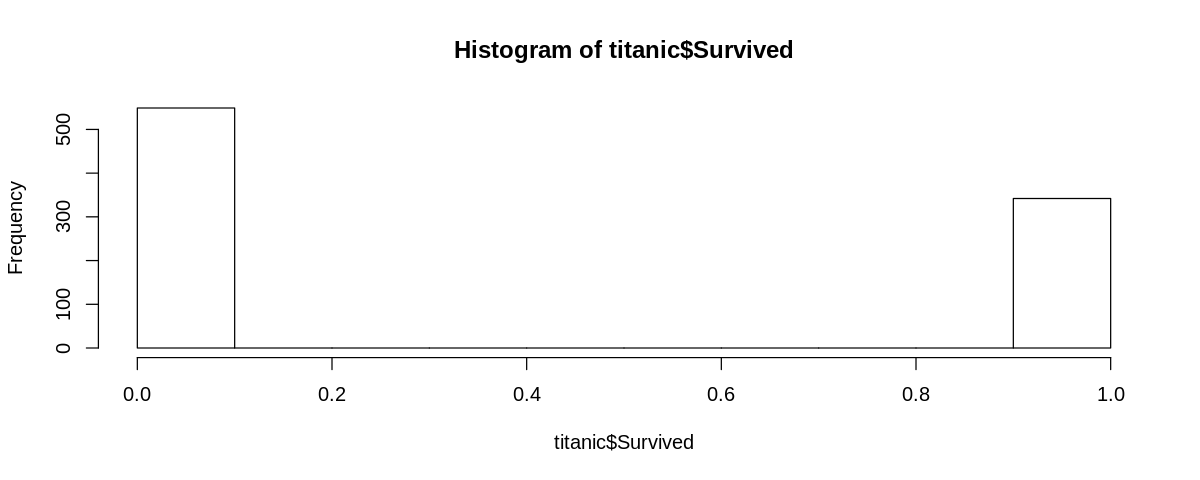

In [4]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

hist(titanic$Survived)

### A Naïve Guess

We will use a naive guess based on the most common class as a benchmark. 61.6% of passengers did not survive. We will guess for our benchmark that there were no survivors. Note that we have done very little work and already have a better then 50-50 chance I've getting a correct answer simply by guessing that no one survived. This is one consideration for having an unevenly distributed target. Simply measuring accuracy may not give us a realistic sense of how well our model is doing. This is one reason why preparing a benchmark is so important. Had we not prepared at benchmark we might think that a 55% accuracy is deceny because it's better than the simple 50-50. This benchmark gives us a sense of what we need to do better than in order to prepare a model that adds value to the situation.

#### Create a vector called `no_survivors` that is a list of predictions that no one survived.

To create such a vector using R, we will use the replicate `rep()` function. This function takes a value and replicates it a given number of times.

In [5]:
number_of_passengers = length(titanic$Survived)

In [6]:
no_survivors <- rep(0, number_of_passengers)

In [7]:
stopifnot(no_survivors == rep(0, length(titanic$Survived)))

Once we have prepared this naïve guess, we can use the `accuracy` function we defined earlier to assess our benchmark as a vector of predictions.

#### accuracy of our naïve prediction

In [8]:
source('metrics.r')

In [9]:
accuracy(titanic$Survived, no_survivors)

[1] 0.6161616

As expected, we achieve an accuracy of $0.\bar{61}$.

### A Vectorized Solution To `fizzbuzz`

`fizzbuzz` is a canonical "coding interview" problem. You might want to read this humorous take by Joel Grus who attempts to use tensor for to solve the problem: http://joelgrus.com/2016/05/23/fizz-buzz-in-tensorflow/. The challenge is to iterate over the numbers from 1 to 100, printing "fizz" if the number is divisible by 3, "buzz" if the number is divisible by 5, "fizzbuzz" if the number is divisible by 15, and the number itself otherwise. Typically this problem is solved using for-loops and if-else statements and is used as a basic assessment of programming ability. Such a solution might look like this

#### a first attempt at `fizzbuzz`

In [10]:
fizzbuzz = function (n) {
    for (i in 1:n) {
        if (i %% 15 == 0) print("fizzbuzz")
        else if (i %% 3 == 0) print("fizz")
        else if (i %% 5 == 0) print("buzz")
        else print(i)
    }
}
fizzbuzz(15)

[1] 1
[1] 2
[1] "fizz"
[1] 4
[1] "buzz"
[1] "fizz"
[1] 7
[1] 8
[1] "fizz"
[1] "buzz"
[1] 11
[1] "fizz"
[1] 13
[1] 14
[1] "fizzbuzz"


It may be a bit much to come up with a solution to this problem using tensorflow. It is, however, very useful to think about solving this problem using masks and filters. Suppose we begin with a simple solution vector as follows

#### start the `solution` vector

In [11]:
solution = 1:15
solution

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

The challenge is to replace the values we don't need with the correct strings. Sure we can iterate over this list check the value to see if it's divisible by three or five but using a vectorized solution we can do it all at once.

The Steps to doing this are as follows:
 
1. Create a mask for a certain condition we might wish to check
1. Use that mask to restrict the values of the original `solution` we are looking at
1. Replace to values of the restricted vector with the appropriate string

First, we create a mask called `mod15_mask`. Note, that when we display it there is only a single `TRUE` value, in the position where the value is divisible by 15 (and in this case is actually 15).

#### create the mod 15 mask

In [12]:
mod15_mask = (solution %% 15 == 0)
mod15_mask

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE

Next, we filter the `solution` using the `mod15_mask`.

#### filter `solution` using the mind 15 mask

In [13]:
solution[mod15_mask]

[1] 15

Finally, we assign the filtered values the string `"fizzbuzz"`

#### assign valued to the filtered `solution` vector

In [14]:
solution[mod15_mask] = "fizzbuzz"

Let's have a look at the current value of our solution.

In [15]:
solution

[1] "1"        "2"        "3"        "4"        "5"        "6"       
 [7] "7"        "8"        "9"        "10"       "11"       "12"      
[13] "13"       "14"       "fizzbuzz"

We can repeat this technique to build an entire solution to the problem.

#### a vectorized `fizzbuzz`

In [16]:
fizzbuzz = function (n) {
    solution = 1:n
    mod3_mask = (solution %% 3 == 0)
    mod5_mask = (solution %% 5 == 0)
    mod15_mask = (solution %% 15 == 0)
    
    solution[mod3_mask] = "fizz"
    solution[mod5_mask] = "buzz"
    solution[mod15_mask] = "fizzbuzz"
    
    cat(solution,sep="\n")
}

fizzbuzz(15)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


In terms of the why of doing a vectorized approach, there are tremendous speed gains to be had implementing your algorithms using vectors rather than loops. To read more about this, have a look at this blog post: http://www.noamross.net/blog/2014/4/16/vectorization-in-r--why.html